In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

In [2]:
#Show DataFrame info.
data = pd.read_csv('marketing_customer_analysis.csv')
display(data)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#Describe DataFrame.

display(data.dtypes)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

Response
No     7826
Yes    1308
Name: count, dtype: int64


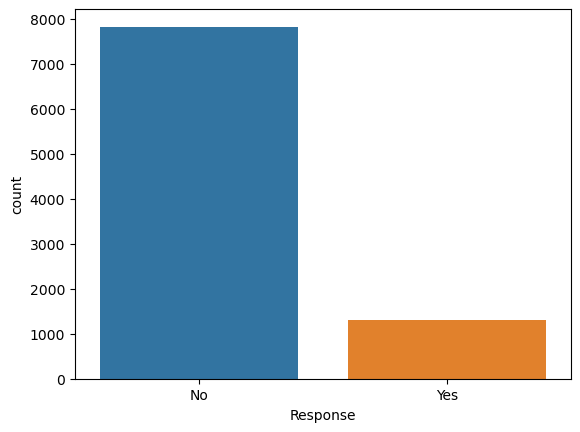

In [4]:
#Show a plot of the total number of responses.
print(data['Response'].value_counts())
numb_responses= data['Response'].value_counts()
fig, ax = plt.subplots()
sns.countplot(data=data, x="Response", order= numb_responses.index)
plt.show()

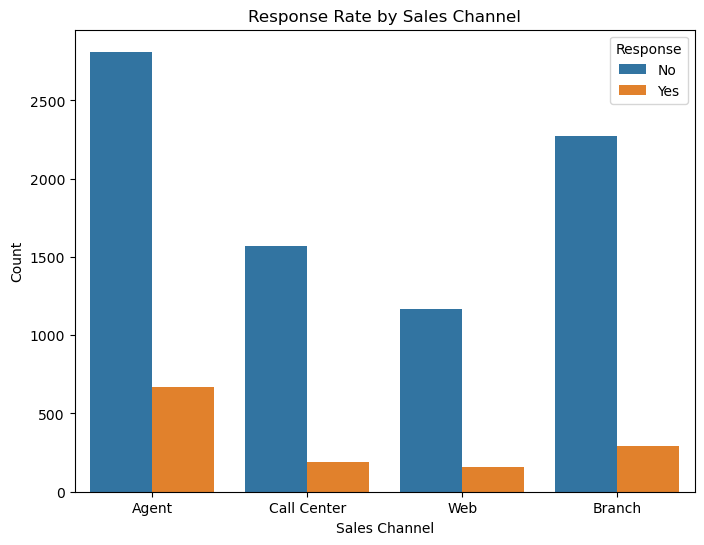

In [5]:
#Show a plot of the response rate by the sales channel.

plt.figure(figsize=(8, 6)) 
sns.countplot(data=data, x="Sales Channel", hue="Response")
plt.title("Response Rate by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.legend(title="Response", loc='upper right')  
plt.show()

### Show a plot of the response rate by the total claim amount.
#Show a plot of the response rate by income.
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=data, x="Total Claim Amount", hue="Response", ax=ax[0])
ax[0].set_title("Response Rate by Total Claim Amount")
ax[0].set_xlabel("Total Claim Amount")
ax[0].set_ylabel("Count")
ax[0].legend(title="Response", loc='upper right')

sns.countplot(data=data, x="Income", hue="Response", ax=ax[1])
ax[1].set_title("Response Rate by Income")
ax[1].set_xlabel("Income")
ax[1].set_ylabel("Count")
ax[1].legend(title="Response", loc='upper right')

plt.tight_layout()  
plt.show()

I TRIED RUNING THIS CELL BUT IT TOOK A LONG LONG TIME

In [6]:
### Show a plot of the response rate by the total claim amount.

#plt.figure(figsize=(10,5))
#sns.countplot(data=data, x="Total Claim Amount", hue="Response")
#plt.title("Response Rate by Total Claim Amount")
#plt.xlabel("Total Claim Amount")
#plt.ylabel("Count")
#plt.legend(title="Response", loc='upper right')  
#plt.show()
###

In [7]:
display(data['Total Claim Amount'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64>

In [8]:
display(data['Total Claim Amount'].unique())

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [9]:
bins = [0, 250, 500, 750,1000, float('inf')]
labels = ['Low', 'Medium','Medium High','High', 'Very High']
data1=data.copy()
data1['Claim Amount Range'] = pd.cut(data1['Total Claim Amount'], bins=bins, labels=labels, right=False)
data1['Claim Amount Range'] = data1['Claim Amount Range'].astype(str)


In [26]:
display(data['Income'].unique())
bins1 = [0, 20000, 40000, 80000, 100000, float('inf')]
labels1 = ['Low', 'Medium','Medium High','High', 'Very High']
data2=data.copy()
data2['Income Range'] = pd.cut(data2['Income'], bins=bins1, labels=labels1, right=False)
data2['Income Range'] = data2['Income Range'].astype(str)
display(data1.dtypes)

array([56274,     0, 48767, ..., 66367, 71941, 21941], dtype=int64)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Claim Amount Ran

In [27]:
print(data2['Income Range'].unique())
print(data1['Claim Amount Range'].unique())

['Medium High' 'Low' 'Medium' 'High']
['Medium' 'Very High' 'Medium High' 'Low' 'High']


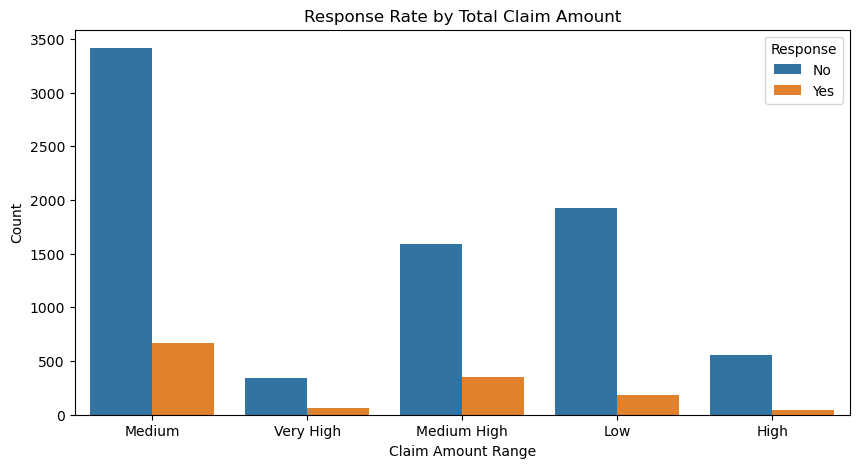

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=data1, x="Claim Amount Range", hue="Response")
plt.title("Response Rate by Total Claim Amount")
plt.xlabel("Claim Amount Range")
plt.ylabel("Count")
plt.legend(title="Response", loc='upper right')  
plt.show()


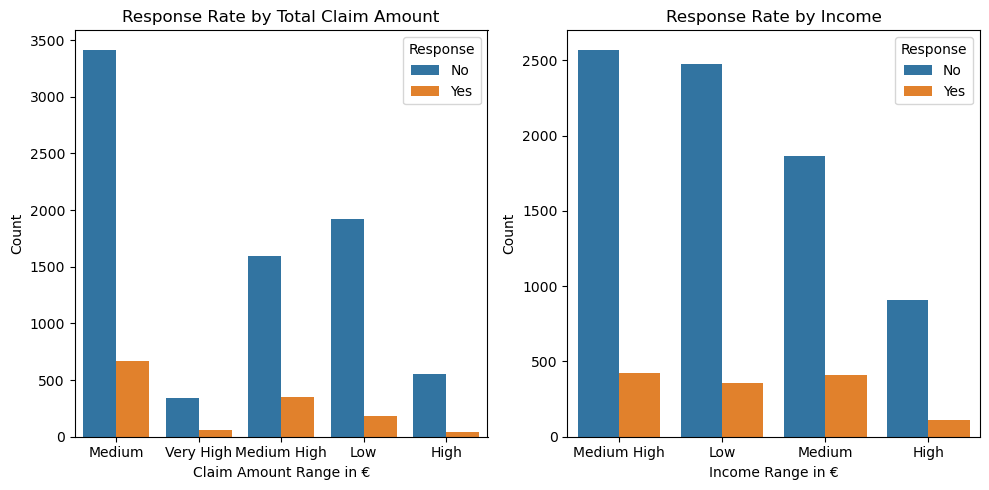

In [28]:
# Show a plot of the response rate by the total claim amount.
#Show a plot of the response rate by income.
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(data=data1, x="Claim Amount Range", hue="Response", ax=ax[0])
ax[0].set_title("Response Rate by Total Claim Amount")
ax[0].set_xlabel("Claim Amount Range in €")
ax[0].set_ylabel("Count")
ax[0].legend(title="Response", loc='upper right')

sns.countplot(data=data2, x="Income Range", hue="Response", ax=ax[1])
ax[1].set_title("Response Rate by Income")
ax[1].set_xlabel("Income Range in €")
ax[1].set_ylabel("Count")
ax[1].legend(title="Response", loc='upper right')

plt.tight_layout()  
plt.show()

In [ ]:
#I don't know why this doesn't work :( 

#It was a typo

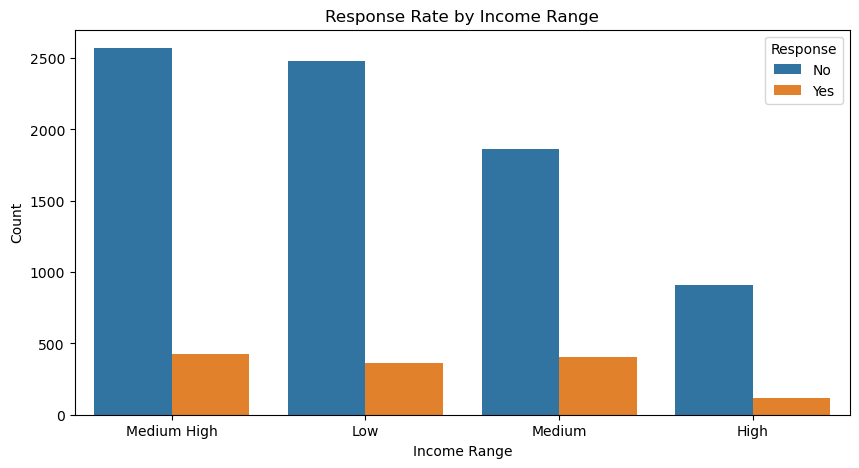

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=data2, x="Income Range", hue="Response")
plt.title("Response Rate by Income Range")
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.legend(title="Response", loc='upper right')  
plt.show()